<a href="https://colab.research.google.com/github/rizkyyfaauzi21/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as pd
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Membuat fungsi konvolusi Fungsi konvolusi yang dibuat memiliki parameter berupa:

1. citra masukan
2. kernel berupa matriks untuk memfilter citra
3. nilai stride/besarnya pergeseran untuk setiap konvolusi
4. nilai pad yang akan ditambahkan pada citra

In [17]:
def convolution2d(image, kernel, stride=1, padding=1):
    # Pastikan bahwa gambar sudah dalam format grayscale
    if len(image.shape) != 2:
        raise ValueError("Gambar harus dalam format grayscale.")

    # Menambahkan padding ke gambar
    padded_image = np.pad(image, pad_width=padding, mode='constant', constant_values=0)

    # Menentukan ukuran output
    output_height = (padded_image.shape[0] - kernel.shape[0]) // stride + 1
    output_width = (padded_image.shape[1] - kernel.shape[1]) // stride + 1

    # Inisialisasi output image
    output = np.zeros((output_height, output_width))

    # Melakukan operasi konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Ambil bagian gambar yang akan dikonvolusi
            region = padded_image[y * stride:y * stride + kernel.shape[0],
                                  x * stride:x * stride + kernel.shape[1]]
            # Melakukan konvolusi (dot product) antara region dan kernel
            output[y, x] = np.sum(region * kernel)

    return output

# Fungsi utama untuk memproses gambar dengan kernel yang diinginkan
def apply_convolution(kernel):
    # Memuat gambar dan mengonversi ke grayscale
    img = cv.imread('/content/drive/MyDrive/PCVK/Assets/female.tiff')
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Memanggil fungsi convolution2d dengan gambar grayscale dan kernel
    output_image = convolution2d(img_gray, kernel, stride=1, padding=1)

    # Menampilkan hasil konvolusi menggunakan cv2_imshow
    cv2_imshow(output_image)

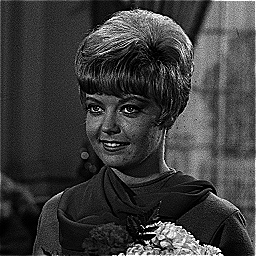

In [18]:
# Definisikan kernel baru sesuai kebutuhan
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Contoh panggilan fungsi apply_convolution dengan kernel sharpen
apply_convolution(kernel_sharpen)

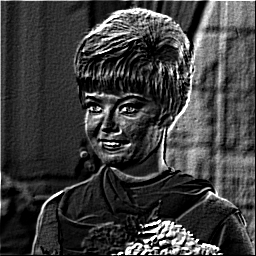

In [19]:
kernel_emboss = np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])

apply_convolution(kernel_emboss)

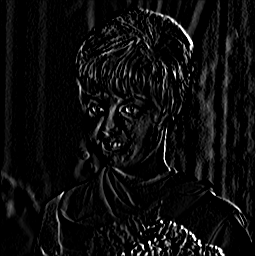

In [21]:
kernel_left_sobel_edge_detection = np.array([[1, 0, -1],
                                             [2, 0, -2],
                                             [1, 0, -1]])

apply_convolution(kernel_left_sobel_edge_detection)

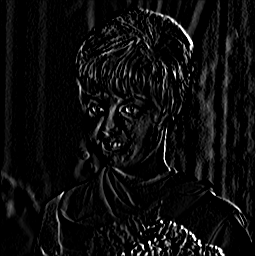

In [22]:
kernel_canny_edge_detection = np.array([[1, 0, -1],
                                       [2, 0, -2],
                                       [1, 0, -1]])

apply_convolution(kernel_canny_edge_detection)

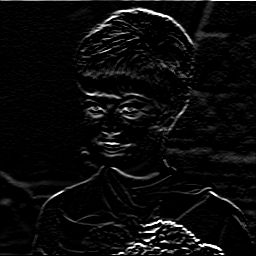

In [23]:
kernel_prewitt_edge_detection = np.array([[-1, -1, -1],
                                          [0, 0, 0],
                                          [1, 1, 1]])

apply_convolution(kernel_prewitt_edge_detection)

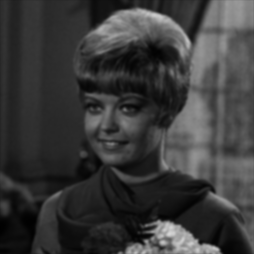

In [24]:
kernel_5x5_gaussian_blur = np.array([[1,  4,  6,  4,  1],
                                     [4, 16, 24, 16,  4],
                                     [6, 24, 36, 24,  6],
                                     [4, 16, 24, 16,  4],
                                     [1,  4,  6,  4,  1]])

kernel_5x5_gaussian_blur = kernel_5x5_gaussian_blur / 256

apply_convolution(kernel_5x5_gaussian_blur)

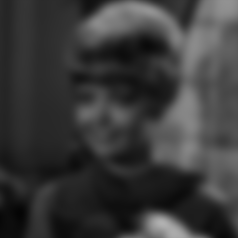

In [25]:
kernel_size = 21

sigma = math.sqrt(kernel_size)

# Menghasilkan kernel Gaussian 1D
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)

# Menghasilkan kernel Gaussian 2D dengan mengalikan 1D kernel dengan transposenya
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T


apply_convolution(gaussian_kernel_2d)

# print(gaussian_kernel_2d)